In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

<AxesSubplot: xlabel='X1', ylabel='X2'>

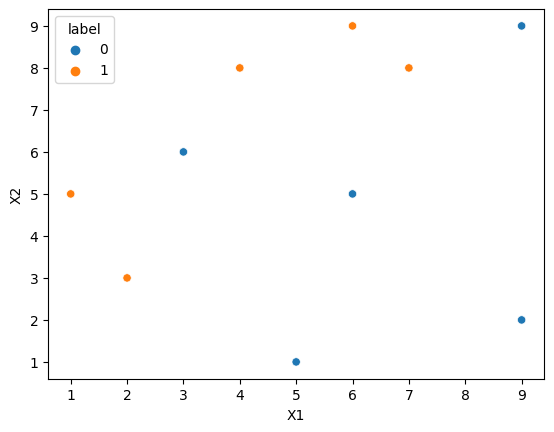

In [4]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [5]:
df['weights'] = 1/df.shape[0]
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


[Text(0.5, 0.75, 'X[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

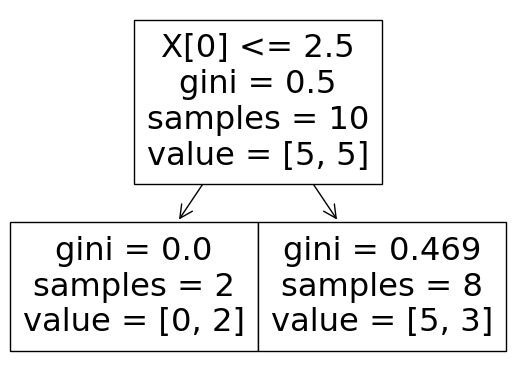

In [6]:
dt1 = DecisionTreeClassifier(max_depth=1)
x = df.iloc[:,0:2].values
y = df.iloc[:,2].values
dt1.fit(x,y)
plot_tree(dt1)

<AxesSubplot: >

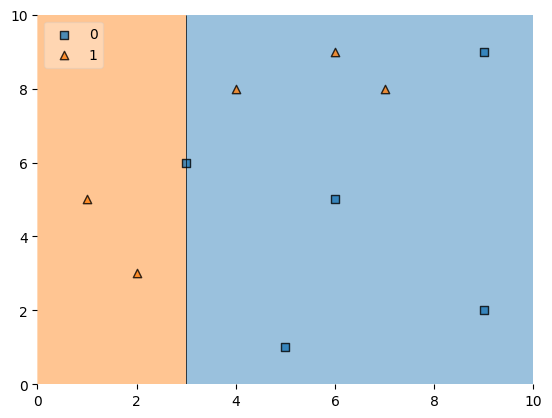

In [7]:
plot_decision_regions(x, y, clf=dt1, legend=2)

In [8]:
df['y_pred'] = dt1.predict(x)
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [9]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [10]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [11]:
# Step 4 - Update weights
def update_row_weights(row,alpha):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [12]:
df['updated_weights'] = df.apply(update_row_weights,args=(alpha1,),axis=1)
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,0,0.065465
3,4,8,1,0.1,0,0.152753
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,0,0.152753
6,6,5,0,0.1,0,0.065465
7,7,8,1,0.1,0,0.152753
8,9,9,0,0.1,0,0.065465
9,9,2,0,0.1,0,0.065465


In [13]:
df['updated_weights'].sum()

0.9165151389911682

In [14]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,0,0.065465,0.071429
3,4,8,1,0.1,0,0.152753,0.166667
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,0,0.152753,0.166667
6,6,5,0,0.1,0,0.065465,0.071429
7,7,8,1,0.1,0,0.152753,0.166667
8,9,9,0,0.1,0,0.065465,0.071429
9,9,2,0,0.1,0,0.065465,0.071429


In [15]:
df['nomalized_weights'].sum()

0.9999999999999999

In [16]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065465,0.000000,0.071429
1,2,3,1,0.1,1,0.065465,0.071429,0.142857
2,3,6,0,0.1,0,0.065465,0.142857,0.214286
3,4,8,1,0.1,0,0.152753,0.214286,0.380952
4,5,1,0,0.1,0,0.065465,0.380952,0.452381
5,6,9,1,0.1,0,0.152753,0.452381,0.619048
6,6,5,0,0.1,0,0.065465,0.619048,0.690476
7,7,8,1,0.1,0,0.152753,0.690476,0.857143
8,9,9,0,0.1,0,0.065465,0.857143,0.928571
9,9,2,0,0.1,0,0.065465,0.928571,1.000000


In [17]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [18]:
index_values = create_new_dataset(df)
index_values

[5, 5, 3, 6, 3, 3, 1, 5, 6, 7]

In [19]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
5,6,9,1,0.1
5,6,9,1,0.1
3,4,8,1,0.1
6,6,5,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
1,2,3,1,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1


[Text(0.5, 0.75, 'X[1] <= 6.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

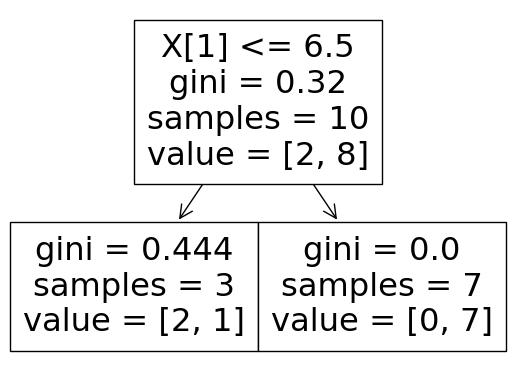

In [20]:
dt2 = DecisionTreeClassifier(max_depth=1)
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
dt2.fit(X,y)
plot_tree(dt2)

<AxesSubplot: >

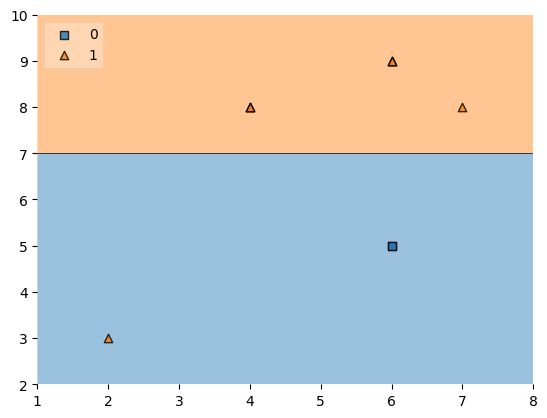

In [21]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [22]:
second_df['y_pred'] = dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,1
5,6,9,1,0.1,1
3,4,8,1,0.1,1
6,6,5,0,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1
1,2,3,1,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,0
7,7,8,1,0.1,1


In [23]:
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [24]:
second_df['updated_weights'] = second_df.apply(update_row_weights,args=(alpha2,),axis=1)
second_df

,X1,X2,label,weights,y_pred,updated_weights
5,6,9,1,0.1,1,0.033333
5,6,9,1,0.1,1,0.033333
3,4,8,1,0.1,1,0.033333
6,6,5,0,0.1,0,0.033333
3,4,8,1,0.1,1,0.033333
3,4,8,1,0.1,1,0.033333
1,2,3,1,0.1,0,0.300000
5,6,9,1,0.1,1,0.033333
6,6,5,0,0.1,0,0.033333
7,7,8,1,0.1,1,0.033333


In [25]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
5,6,9,1,0.1,1,0.033333,0.055556
5,6,9,1,0.1,1,0.033333,0.055556
3,4,8,1,0.1,1,0.033333,0.055556
6,6,5,0,0.1,0,0.033333,0.055556
3,4,8,1,0.1,1,0.033333,0.055556
3,4,8,1,0.1,1,0.033333,0.055556
1,2,3,1,0.1,0,0.300000,0.500000
5,6,9,1,0.1,1,0.033333,0.055556
6,6,5,0,0.1,0,0.033333,0.055556
7,7,8,1,0.1,1,0.033333,0.055556


In [26]:
second_df['nomalized_weights'].sum()

1.0000000000000002

In [27]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
5,6,9,1,0.1,1,0.055556,0.000000,0.055556
5,6,9,1,0.1,1,0.055556,0.055556,0.111111
3,4,8,1,0.1,1,0.055556,0.111111,0.166667
6,6,5,0,0.1,0,0.055556,0.166667,0.222222
3,4,8,1,0.1,1,0.055556,0.222222,0.277778
3,4,8,1,0.1,1,0.055556,0.277778,0.333333
1,2,3,1,0.1,0,0.500000,0.333333,0.833333
5,6,9,1,0.1,1,0.055556,0.833333,0.888889
6,6,5,0,0.1,0,0.055556,0.888889,0.944444
7,7,8,1,0.1,1,0.055556,0.944444,1.000000


In [28]:
index_values = create_new_dataset(second_df)
third_df = second_df.iloc[:,[0,1,2,3]]
third_df

,X1,X2,label,weights
5,6,9,1,0.1
5,6,9,1,0.1
3,4,8,1,0.1
6,6,5,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
1,2,3,1,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1


In [29]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<AxesSubplot: >

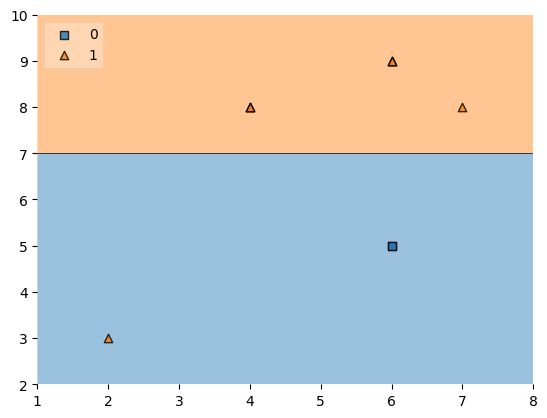

In [30]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [31]:
third_df['y_pred'] = dt3.predict(X)
third_df

C:\Users\Cygnus\AppData\Local\Temp\ipykernel_10520\1974815725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_df['y_pred'] = dt3.predict(X)


,X1,X2,label,weights,y_pred
5,6,9,1,0.1,1
5,6,9,1,0.1,1
3,4,8,1,0.1,1
6,6,5,0,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1
1,2,3,1,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,0
7,7,8,1,0.1,1


In [32]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [33]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


# Prediction

In [34]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [35]:
dt2.predict(query)

array([0], dtype=int64)

In [36]:
dt3.predict(query)

array([0], dtype=int64)

In [37]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [38]:
np.sign(1.09)

1.0

In [39]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0], dtype=int64)

In [40]:
dt2.predict(query)

array([1], dtype=int64)

In [41]:
dt3.predict(query)

array([1], dtype=int64)

In [42]:
alpha1*(-1) + alpha2*(-1) + alpha3*(-1)

-1.09861228866811